In [1]:
import networkx as nx
import numpy as np

Number of nodes: 8


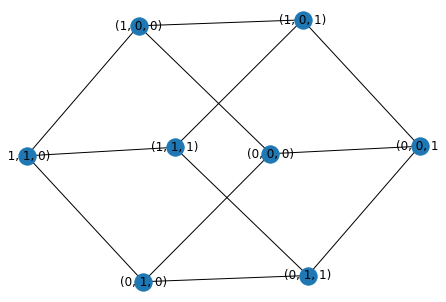

In [2]:
#Cube graph

#G = nx.generators.lattice.grid_graph(dim=(3,4))
cube=nx.generators.lattice.hypercube_graph(3)
n_nodes = len(cube)
print("Number of nodes:", n_nodes)
nx.draw(cube, with_labels=True)

In [3]:
# Construct a dictionary that maps the label of nodes  
# (from (0,0) to (3,2)) to their index (from 0 to n_nodes-1)
indices = dict()
for i in range(n_nodes):
    indices[list(cube.nodes)[i]] = i
print(indices)

{(0, 0, 0): 0, (0, 0, 1): 1, (0, 1, 0): 2, (0, 1, 1): 3, (1, 0, 0): 4, (1, 0, 1): 5, (1, 1, 0): 6, (1, 1, 1): 7}


In [5]:
# Number of iterations
n_iter = 50;

# We will store final opinion vectors and 
# average of final opinions in dictionaries
# where the key is the position (i,j) of the 
# 1-stubborn agent
final_opinions = dict()
average_opinion = dict() 


for (i,j,k) in cube.nodes:
    # Position (0,0,0) is occupied by the 0-stubborn node
    if (i,j,k)==(0,0,0):
        continue
        
    # Stubborn and regular nodes
    stubborn = [(0,0,0), (i,j,k)];
    stubborn_id = [indices.get(key) for key in stubborn]
    regular = [node for node in cube.nodes if node not in stubborn]
    regular_id = [id for id in range(n_nodes) if id not in stubborn_id]
    print("Stubborn nodes:", stubborn)

    # Input to stubborn nodes
    u = [0,1]


    # P matrix
    A = nx.adjacency_matrix(cube) # -> return type is scipy.sparse.csr_matrix
    A = A.toarray() # convert A to a numpy array
    degrees = np.sum(A,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ A

    # Submatrices
    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular))

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes,n_iter))
    x[stubborn_id,0] = u;
    x[regular_id,0] = ic;

    for t in range(1,n_iter):
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[stubborn_id, t] = x[stubborn_id, t-1];

    final_opinions[(i,j,k)] = x[:,n_iter-1]
    average_opinion[(i,j,k)] = np.average(final_opinions[(i,j,k)])
    print("Average opinion:", average_opinion[(i,j,k)])

Stubborn nodes: [(0, 0, 0), (0, 0, 1)]
Average opinion: 0.5000020462116177
Stubborn nodes: [(0, 0, 0), (0, 1, 0)]
Average opinion: 0.5000042931367064
Stubborn nodes: [(0, 0, 0), (0, 1, 1)]
Average opinion: 0.49999996288157617
Stubborn nodes: [(0, 0, 0), (1, 0, 0)]
Average opinion: 0.4999989918486153
Stubborn nodes: [(0, 0, 0), (1, 0, 1)]
Average opinion: 0.5000000621919141
Stubborn nodes: [(0, 0, 0), (1, 1, 0)]
Average opinion: 0.4999999508902825
Stubborn nodes: [(0, 0, 0), (1, 1, 1)]
Average opinion: 0.5000000000466285


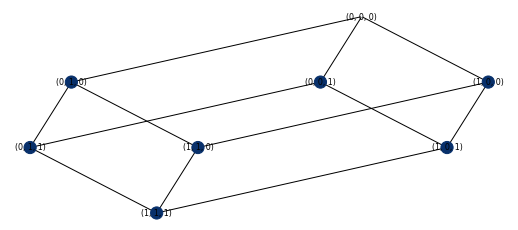

In [6]:
import matplotlib.pyplot as plt
# add a dummy (0,0) entry to the dictionary
# to make its size = n_nodes
average_opinion[(0,0,0)] = 0

plt.figure(1, figsize=(7,3))
nx.draw(cube, 
        pos = nx.spectral_layout(cube),
        with_labels=True, 
        node_size = [np.exp(10*average_opinion[node]) for node in cube.nodes],
        node_color= [average_opinion[node] for node in cube.nodes],
        font_size=8,
        # node's colors are on the red scale
        cmap=plt.cm.Blues)

In [7]:
# convert the average opinion values from dict_values to numpy array
avg = np.fromiter(average_opinion.values(),dtype=float)

optimal_place = [place for place in average_opinion.keys() if average_opinion[place]==np.max(avg)]
print("Optimal placements:", optimal_place)
for i,j,k in optimal_place:
    
    print("Best average opinion value:", average_opinion[(i,j,k)])

Optimal placements: [(0, 1, 0)]
Best average opinion value: 0.5000042931367064


Number of nodes: 14


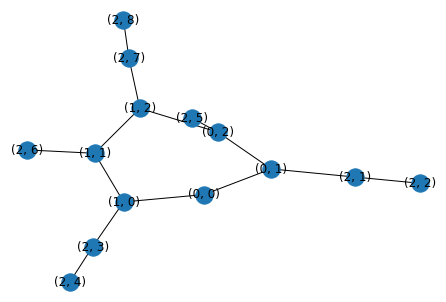

In [8]:
G=nx.generators.lattice.hexagonal_lattice_graph(1,1)
G.add_node((2,1))
G.add_node((2,2))
G.add_node((2,3))
G.add_node((2,4))
G.add_node((2,5))
G.add_node((2,6))
G.add_node((2,7))
G.add_node((2,8))
G.add_edge((0,1), (2,1))
G.add_edge((2,1), (2,2))
G.add_edge((1,0), (2,3))
G.add_edge((2,3), (2,4))
G.add_edge((0,2), (2,5))
G.add_edge((1,1), (2,6))
G.add_edge((1,2), (2,7))
G.add_edge((2,7), (2,8))
n_nodes = len(G)
print("Number of nodes:", n_nodes)
nx.draw(G,with_labels=True)

In [9]:
indices = dict()
for i in range(n_nodes):
    indices[list(G.nodes)[i]] = i
print(indices)

{(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 0): 3, (1, 1): 4, (1, 2): 5, (2, 1): 6, (2, 2): 7, (2, 3): 8, (2, 4): 9, (2, 5): 10, (2, 6): 11, (2, 7): 12, (2, 8): 13}


In [10]:
# Number of iterations
n_iter = 50;

# We will store final opinion vectors and 
# average of final opinions in dictionaries
# where the key is the position (i,j) of the 
# 1-stubborn agent
final_opinions = dict()
average_opinion = dict() 


for (i,j) in G.nodes:
    # Position (0,0,0) is occupied by the 0-stubborn node
    if (i,j)==(0,0):
        continue
        
    # Stubborn and regular nodes
    stubborn = [(0,0), (i,j)];
    stubborn_id = [indices.get(key) for key in stubborn]
    regular = [node for node in G.nodes if node not in stubborn]
    regular_id = [id for id in range(n_nodes) if id not in stubborn_id]
    print("Stubborn nodes:", stubborn)

    # Input to stubborn nodes
    u = [0,1]


    # P matrix
    A = nx.adjacency_matrix(G) # -> return type is scipy.sparse.csr_matrix
    A = A.toarray() # convert A to a numpy array
    degrees = np.sum(A,axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ A

    # Submatrices
    Q = P[np.ix_(regular_id, regular_id)]
    E = P[np.ix_(regular_id, stubborn_id)]

    # Sample a random initial condition for regular nodes
    ic = np.random.uniform(0,1,len(regular))

    # Set the initial condition for the dynamics
    x = np.zeros((n_nodes,n_iter))
    x[stubborn_id,0] = u;
    x[regular_id,0] = ic;

    for t in range(1,n_iter):
        x[regular_id, t] = Q @ x[regular_id, t-1] + E @ x[stubborn_id, t-1]
        x[stubborn_id, t] = x[stubborn_id, t-1];

    final_opinions[(i,j)] = x[:,n_iter-1]
    average_opinion[(i,j)] = np.average(final_opinions[(i,j)])
    print("Average opinion:", average_opinion[(i,j)])

Stubborn nodes: [(0, 0), (0, 1)]
Average opinion: 0.559800810293971
Stubborn nodes: [(0, 0), (0, 2)]
Average opinion: 0.5363902618913698
Stubborn nodes: [(0, 0), (1, 0)]
Average opinion: 0.5554117037462619
Stubborn nodes: [(0, 0), (1, 1)]
Average opinion: 0.5358397466910294
Stubborn nodes: [(0, 0), (1, 2)]
Average opinion: 0.547636784467237
Stubborn nodes: [(0, 0), (2, 1)]
Average opinion: 0.33795520730844636
Stubborn nodes: [(0, 0), (2, 2)]
Average opinion: 0.2602298871862017
Stubborn nodes: [(0, 0), (2, 3)]
Average opinion: 0.3402284072986959
Stubborn nodes: [(0, 0), (2, 4)]
Average opinion: 0.253897166762394
Stubborn nodes: [(0, 0), (2, 5)]
Average opinion: 0.3397631481241775
Stubborn nodes: [(0, 0), (2, 6)]
Average opinion: 0.33849722253636294
Stubborn nodes: [(0, 0), (2, 7)]
Average opinion: 0.38612426525915533
Stubborn nodes: [(0, 0), (2, 8)]
Average opinion: 0.29797418034762846


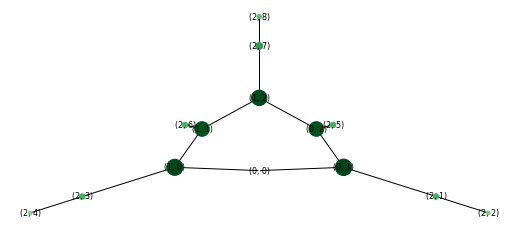

In [11]:
import matplotlib.pyplot as plt
# add a dummy (0,0) entry to the dictionary
# to make its size = n_nodes
average_opinion[(0,0)] = 0

plt.figure(1, figsize=(7,3))
nx.draw(G, 
        pos = nx.spectral_layout(G),
        with_labels=True, 
        node_size = [np.exp(10*average_opinion[node]) for node in G.nodes],
        node_color= [average_opinion[node] for node in G.nodes],
        font_size=8,
        # node's colors are on the red scale
        cmap=plt.cm.Greens)

In [12]:
# convert the average opinion values from dict_values to numpy array
avg = np.fromiter(average_opinion.values(),dtype=float)

optimal_place = [place for place in average_opinion.keys() if average_opinion[place]==np.max(avg)]
print("Optimal placements:", optimal_place)
for i,j in optimal_place:
    
    print("Best average opinion value:", average_opinion[(i,j)])

Optimal placements: [(0, 1)]
Best average opinion value: 0.559800810293971
